# Imports and init

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Import ICNN/NF models with specific names to avoid conflicts
from NF.models import ICNN, DeepConvexFlow, create_model as create_icnn_model
from NF.utils import get_data, sample_data
from NF.train import train_stepwise
from NF.tests import plot_samples, l2_test

# Import RBF models with specific names to avoid conflicts
from RBF.model import RadialBasisFlow, create_model as create_rbf_model
from RBF.train import train as train_rbf
from RBF.utils import (
    sample_exact_ring,
    log_rho_exact_ring,
    sample_from_flow,
    estimate_forward_KL,
    compute_negative_log_likelihood
)

# Generate Data

In [57]:
S, X = get_data(1000)

In [58]:
model, model_info = create_icnn_model(
    2, [2, 2], n_icnns=3, bias_w1=0.0
)

In [59]:
model_info

{'model_type': 'DeepConvexFlow',
 'n_dim': 2,
 'hidden_dims': [2, 2],
 'n_icnns': 3,
 'w0_scale': 0.1,
 'bias_w1': 0.0,
 'betas_init': [Parameter containing:
  tensor(0., requires_grad=True),
  Parameter containing:
  tensor(0., requires_grad=True),
  Parameter containing:
  tensor(0., requires_grad=True)]}

Stepwise Training

Stage 1: Training ICNN 0
[icnn_0_solo] Epoch 010/500 - NLL = 3.721696
[icnn_0_solo] Epoch 020/500 - NLL = 1.630297
[icnn_0_solo] Epoch 030/500 - NLL = 1.049808


/Users/sed/Documents/GitHub/polymath25-ML/Normalizing Flows/NF/models.py:167: UserWarning: brute force
  warnings.warn("brute force", UserWarning)


[icnn_0_solo] Epoch 040/500 - NLL = 0.542466
[icnn_0_solo] Epoch 050/500 - NLL = 0.478042
[icnn_0_solo] Epoch 060/500 - NLL = 0.412927
[icnn_0_solo] Epoch 070/500 - NLL = 0.361940
[icnn_0_solo] Epoch 080/500 - NLL = 0.318961
[icnn_0_solo] Epoch 090/500 - NLL = 0.274467
[icnn_0_solo] Epoch 100/500 - NLL = 0.231555
[icnn_0_solo] Epoch 110/500 - NLL = 0.189203
[icnn_0_solo] Epoch 120/500 - NLL = 0.147858
[icnn_0_solo] Epoch 130/500 - NLL = 0.108146
[icnn_0_solo] Epoch 140/500 - NLL = 0.070693
[icnn_0_solo] Epoch 150/500 - NLL = 0.036159
[icnn_0_solo] Epoch 160/500 - NLL = 0.004947
[icnn_0_solo] Epoch 170/500 - NLL = -0.022790
[icnn_0_solo] Epoch 180/500 - NLL = -0.047087
[icnn_0_solo] Epoch 190/500 - NLL = -0.068130
[icnn_0_solo] Epoch 200/500 - NLL = -0.086208
[icnn_0_solo] Epoch 210/500 - NLL = -0.101663
[icnn_0_solo] Epoch 220/500 - NLL = -0.114845
[icnn_0_solo] Epoch 230/500 - NLL = -0.126089
[icnn_0_solo] Epoch 240/500 - NLL = -0.135695
[icnn_0_solo] Epoch 250/500 - NLL = -0.143924
[

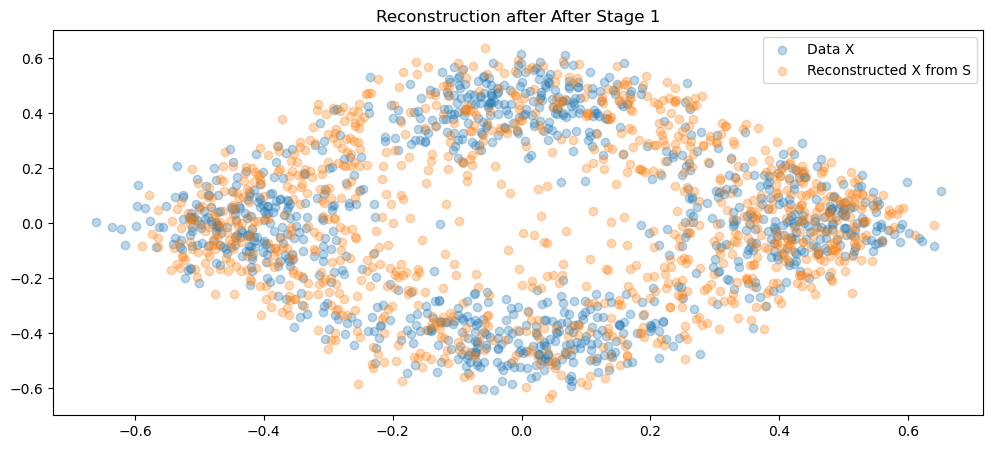


Stage 2: Training ICNN 1
[icnn_1_solo] Epoch 010/500 - NLL = -0.194601
[icnn_1_solo] Epoch 020/500 - NLL = -0.194872
[icnn_1_solo] Epoch 030/500 - NLL = -0.194936
[icnn_1_solo] Epoch 040/500 - NLL = -0.194952
[icnn_1_solo] Epoch 050/500 - NLL = -0.194951
[icnn_1_solo] Epoch 060/500 - NLL = -0.194959
[icnn_1_solo] Epoch 070/500 - NLL = -0.194965
[icnn_1_solo] Epoch 080/500 - NLL = -0.194967
[icnn_1_solo] Epoch 090/500 - NLL = -0.194967
[icnn_1_solo] Epoch 100/500 - NLL = -0.194967
[icnn_1_solo] Epoch 110/500 - NLL = -0.194968
[icnn_1_solo] Epoch 120/500 - NLL = -0.194968
[icnn_1_solo] Epoch 130/500 - NLL = -0.194969
[icnn_1_solo] Epoch 140/500 - NLL = -0.194969
[icnn_1_solo] Epoch 150/500 - NLL = -0.194969
[icnn_1_solo] Epoch 160/500 - NLL = -0.194969
[icnn_1_solo] Epoch 170/500 - NLL = -0.194969
[icnn_1_solo] Epoch 180/500 - NLL = -0.194970
[icnn_1_solo] Epoch 190/500 - NLL = -0.194969
[icnn_1_solo] Epoch 200/500 - NLL = -0.194969
[icnn_1_solo] Epoch 210/500 - NLL = -0.194970
[icnn_1_

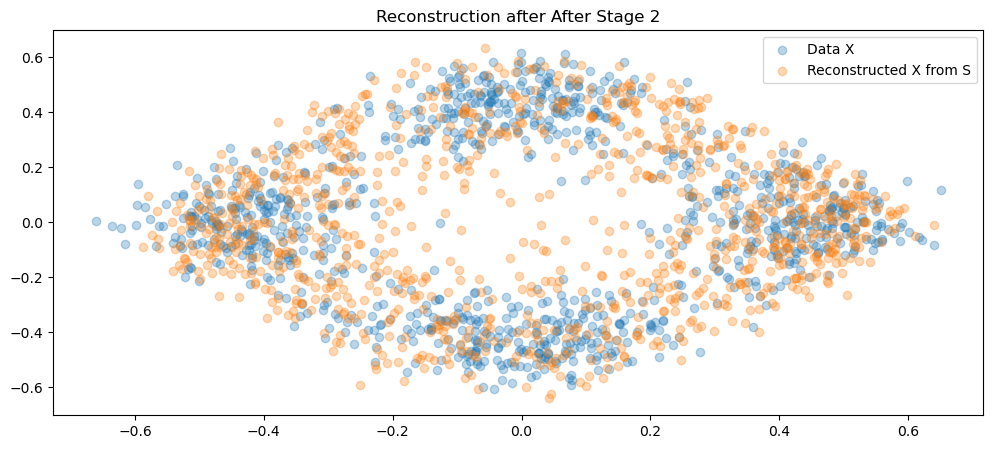


Stage 3: Training ICNN 2
[icnn_2_solo] Epoch 010/500 - NLL = -0.194904
[icnn_2_solo] Epoch 020/500 - NLL = -0.194962
[icnn_2_solo] Epoch 030/500 - NLL = -0.194968
[icnn_2_solo] Epoch 040/500 - NLL = -0.194969
[icnn_2_solo] Epoch 050/500 - NLL = -0.194970
[icnn_2_solo] Epoch 060/500 - NLL = -0.194970
[icnn_2_solo] Epoch 070/500 - NLL = -0.194970
[icnn_2_solo] Epoch 080/500 - NLL = -0.194970
[icnn_2_solo] Epoch 090/500 - NLL = -0.194970
[icnn_2_solo] Epoch 100/500 - NLL = -0.194970
[icnn_2_solo] Epoch 110/500 - NLL = -0.194970
[icnn_2_solo] Epoch 120/500 - NLL = -0.194970
[icnn_2_solo] Epoch 130/500 - NLL = -0.194970
[icnn_2_solo] Epoch 140/500 - NLL = -0.194970
[icnn_2_solo] Epoch 150/500 - NLL = -0.194970
[icnn_2_solo] Epoch 160/500 - NLL = -0.194970
[icnn_2_solo] Epoch 170/500 - NLL = -0.194970
[icnn_2_solo] Epoch 180/500 - NLL = -0.194970
[icnn_2_solo] Epoch 190/500 - NLL = -0.194970
[icnn_2_solo] Epoch 200/500 - NLL = -0.194970
[icnn_2_solo] Epoch 210/500 - NLL = -0.194970
[icnn_2_

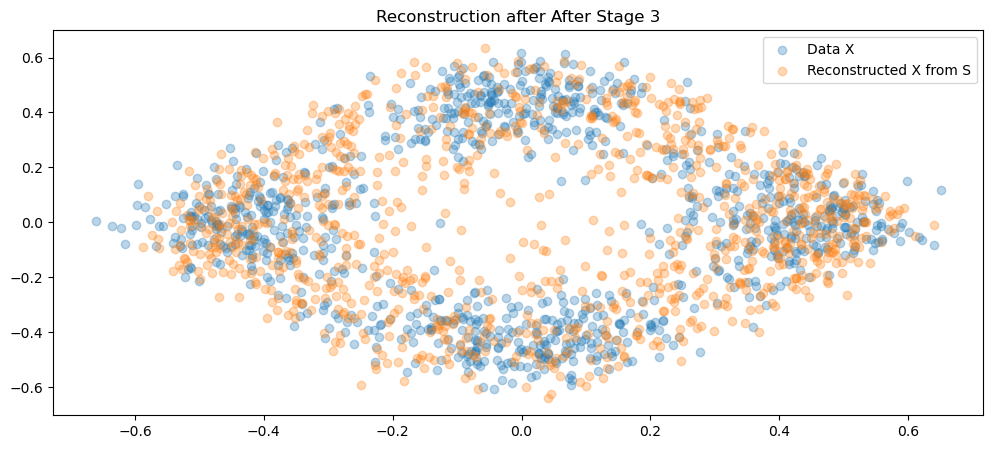


Final Joint Fine-tuning
[final_finetune] Epoch 010/100 - NLL = -0.160074
[final_finetune] Epoch 020/100 - NLL = -0.200461
[final_finetune] Epoch 030/100 - NLL = -0.211910
[final_finetune] Epoch 040/100 - NLL = -0.216554
[final_finetune] Epoch 050/100 - NLL = -0.220984
[final_finetune] Epoch 060/100 - NLL = -0.223133
[final_finetune] Epoch 070/100 - NLL = -0.224521
[final_finetune] Epoch 080/100 - NLL = -0.225313
[final_finetune] Epoch 090/100 - NLL = -0.225638
[final_finetune] Epoch 100/100 - NLL = -0.225700


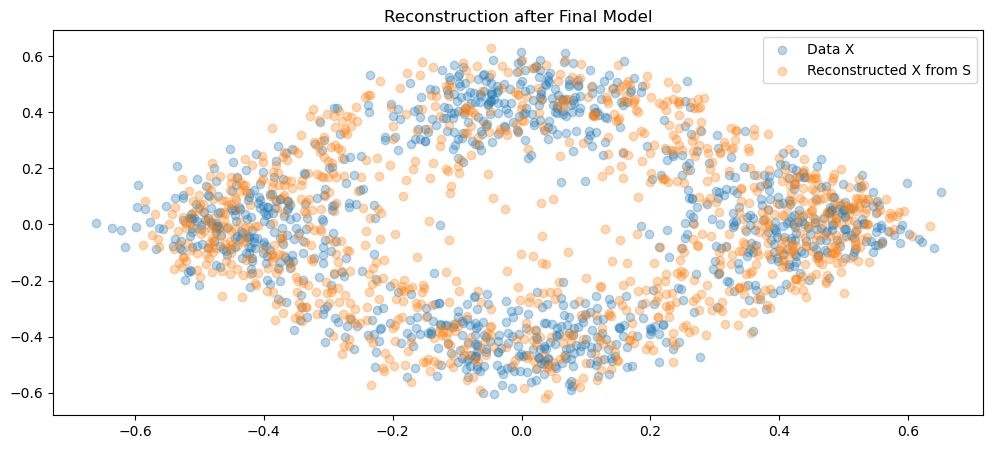

In [60]:
train_stepwise(
    model=model,
    X=X,
    batch_size=1000,
    lr=5e-2,
    epochs_per_step=500,
)

In [61]:
samples = model.reverse(torch.tensor(S, dtype=torch.float32)).cpu().detach().numpy()

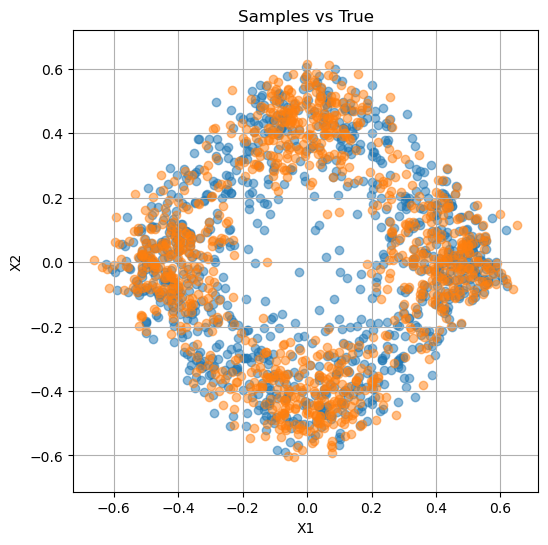

In [62]:
plot_samples(samples, X)
plt.show()

In [63]:
l2_test(X, samples)

0.044042155519847866

# Radial Basis Function Approach

In [70]:
# Generate data for RBF model
S_rbf, X_rbf = get_data(1000)

# Create RBF model
rbf_model, rbf_model_info = create_rbf_model(
    n_p=500,
    epsilon=0.1
)

In [71]:
rbf_model_info

{'model_type': 'RadialBasisFlow', 'n_p': 500, 'epsilon': 0.1}

Training Radial Basis Flow
Data shape: torch.Size([1000, 2])
Number of steps: 600
n_p: 500, epsilon: 0.1


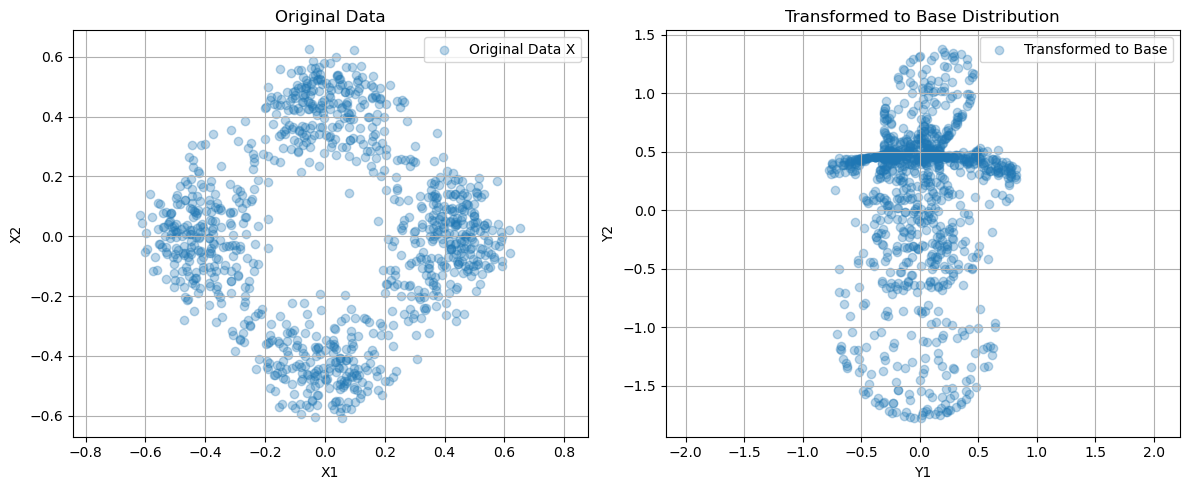


Training completed!


RadialBasisFlow()

In [72]:
# Train RBF model (with convexity check enabled)
train_rbf(
    X=torch.tensor(X_rbf, dtype=torch.float32),
    model=rbf_model,
    n_steps=600,
    print_every=100,
    visualize=True,
    n_viz_samples=1000,
    use_convexity_check=False,
    convexity_check_samples=200,
    beta_reduction_factor=2
)

In [ ]:
# Generate samples from RBF model using LBFGS (more accurate)
# LBFGS with better initialization should give better results
rbf_samples = sample_from_flow(
    rbf_model,
    n_samples=1000,
    max_iter=2000,  # More iterations for better convergence
    lr=1.0,  # LBFGS typically uses higher learning rate
    use_lbfgs=True,  # Use LBFGS for more accurate optimization
    batch_size=50  # Process in smaller batches for better convergence
).cpu().detach().numpy()

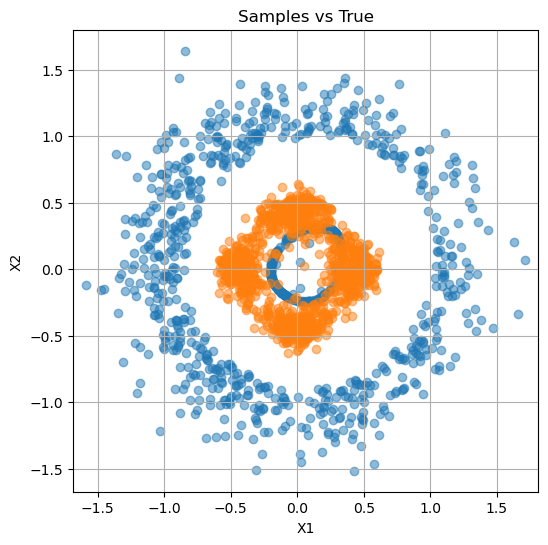

In [ ]:
# Samples vs True (RBF model)
plot_samples(rbf_samples, X_rbf, title="Samples vs True")
plt.show()

In [69]:
# L2 test (RBF model)
l2_test(X_rbf, rbf_samples)

0.9735502937161482